# About the Problem statement


In united states before the election, the government was undergoing an survey regarding the monthly salary of some of the demographic regions.Now they want to automate this process for further information and maintaing the database.  



# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# About the Dataset



This dataset consist of age of the people, workclass means what category of job, fnlwgt which is like credit score, education they are studying, maritial status of the person, Occupation they are in, relationship they have in family, race they come from, Sex they possess, native country , capital loss and gain are the financial amount , hours per week they work in week and income status is greater than 50k or not.





# Import the dataset

In [2]:
df =pd.read_csv('income_evaluation.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Renaming Columns in dataframe

In [3]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

# View Dimension of the Dataset

In [4]:
print('The shape of the dataset : ', df.shape)

The shape of the dataset :  (32561, 15)


# View summary of dataset 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Detecting Missing Values

In [6]:
(df.isnull().sum()/df.shape[0])*100

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education_num     0.0
marital_status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital_gain      0.0
capital_loss      0.0
hours_per_week    0.0
native_country    0.0
income            0.0
dtype: float64

# Findings


income is the target variable.

There are no  missing values in the dataset.

# Check the data types of columns

In [7]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

# View statistical properties of dataset 

we want to view the statistical properties in horizontal form for the entire dataset.


In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32561.0,NaN,NaN,NaN,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
workclass,32561,9,Private,22696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,32561.0,NaN,NaN,NaN,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education,32561,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_num,32561.0,NaN,NaN,NaN,10.080679,2.57272,1.0,9.0,10.0,12.0,16.0
marital_status,32561,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,32561,15,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,32561,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,32561,5,White,27816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,32561,2,Male,21790,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# No of unique values  in the columns

In [9]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital_loss         92
hours_per_week       94
native_country       42
income                2
dtype: int64

# Find categorical variables

In [15]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


# Summary of categorical variables

   There are 9 categorical variables in the dataset.

   The categorical variables are given by workclass, education, marital_status, occupation, relationship, race, sex,native_country and income.

   income is the target variable

# visualize frequency distribution of income variable

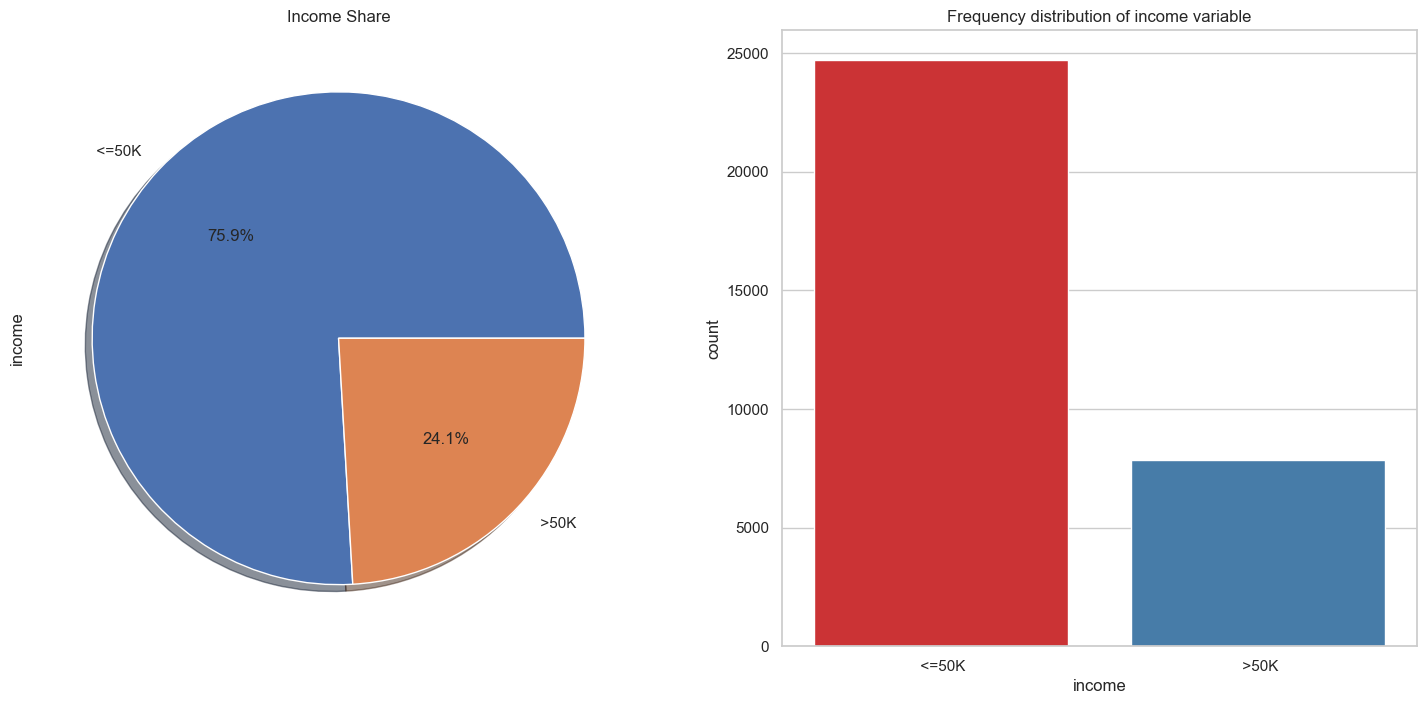

In [16]:
f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = df['income'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Income Share')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="income", data=df, palette="Set1")
ax[1].set_title("Frequency distribution of income variable")

plt.show()

# correlation heatmap to find out correlations

In [17]:
df.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.0,-0.07665,0.03653,0.07767,0.05777,0.06876
fnlwgt,-0.07665,1.0,-0.04319,0.0004319,-0.01025,-0.01877
education_num,0.03653,-0.04319,1.0,0.1226,0.07992,0.1481
capital_gain,0.07767,0.0004319,0.1226,1.0,-0.03162,0.07841
capital_loss,0.05777,-0.01025,0.07992,-0.03162,1.0,0.05426
hours_per_week,0.06876,-0.01877,0.1481,0.07841,0.05426,1.0


#### Interpretation
   We can see that there is no strong correlation between variables.

#### Declare Predictor vector and target variable

In [18]:
X = df.drop(['income'], axis=1)

y = df['income']

#### Split data into separate training and test set 

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [20]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((22792, 14), (9769, 14))

#### categorical & Numerical feautres

In [21]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [22]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

### Encode categorical variables

Encoding categorical data is a process of converting categorical data into integer format so that the data with converted categorical values can be provided to the different forms of algorithm

In [23]:
X_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
32098,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
25206,State-gov,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,United-States
23491,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States
12367,Private,HS-grad,Never-married,Craft-repair,Not-in-family,White,Male,Guatemala
7054,Private,7th-8th,Never-married,Craft-repair,Not-in-family,White,Male,Germany


In [ ]:
# pip install category-encoders

In [25]:
import category_encoders as ce

In [26]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

In [27]:
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship','race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

### Feature Scaling 

In [28]:
cols = X_train.columns

In [30]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [31]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

### Random Forest Classifier model with default parameters

In [32]:
warnings.simplefilter("ignore")
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [197]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8559


The Random Forest Classifier model with default parameter of n_estimators = 10. So, I have used 10 decision-trees to build the model. Now, we will increase the number of decision-trees and see its effect on accuracy.

#  Random Forest Classifier model with 100 Decision Trees 

In [35]:
warnings.filterwarnings("ignore") 
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_100.fit(X_train, y_train)
y_pred_100 = rfc_100.predict(X_test)

In [36]:
y_pred_100 = rfc_100.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 10 decision-trees : 0.8559


####  Find important features with Random Forest model

In [38]:
feat_dict= {}
for col, val in sorted(zip(X_train.columns, rfc_100.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict[col]=val

In [39]:
feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})
feat_df[:5]

,Feature,Importance
0,"(fnlwgt,)",0.156591
1,"(age,)",0.146444
2,"(capital_gain,)",0.097114
3,"(hours_per_week,)",0.082083
4,"(education_num,)",0.063055


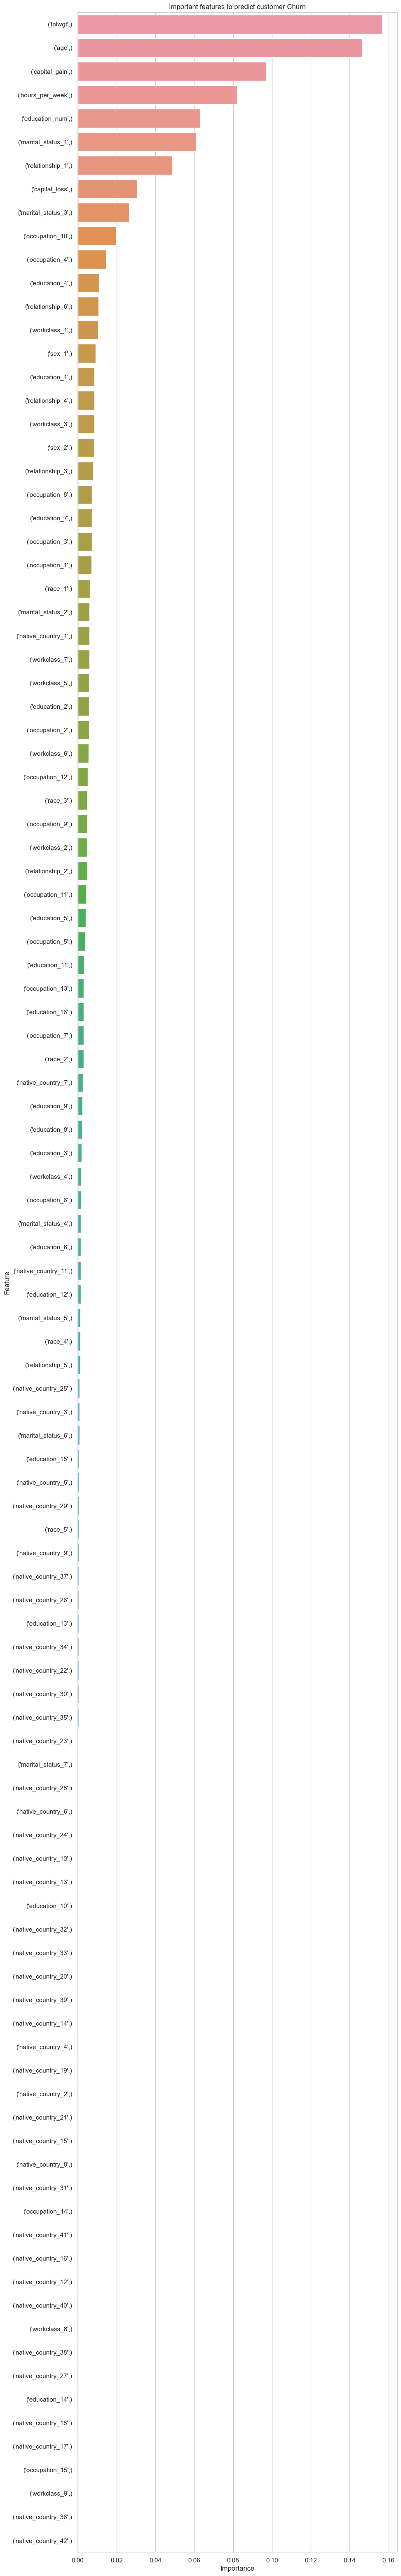

In [40]:
values = feat_df.Importance    
idx = feat_df.Feature
plt.figure(figsize=(10,80))
sns.barplot(y=idx,x=values).set(title='Important features to predict customer Churn')
plt.show()

#### Confusion Matrix



<AxesSubplot:>

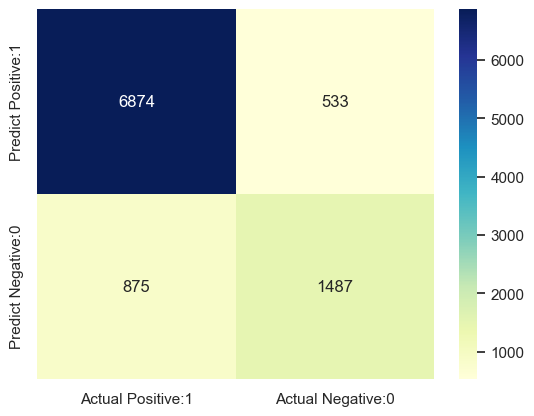

In [41]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_100)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

#### Classification Report

In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7407
        >50K       0.74      0.63      0.68      2362

    accuracy                           0.86      9769
   macro avg       0.81      0.78      0.79      9769
weighted avg       0.85      0.86      0.85      9769

